## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [22]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<AxesSubplot:>

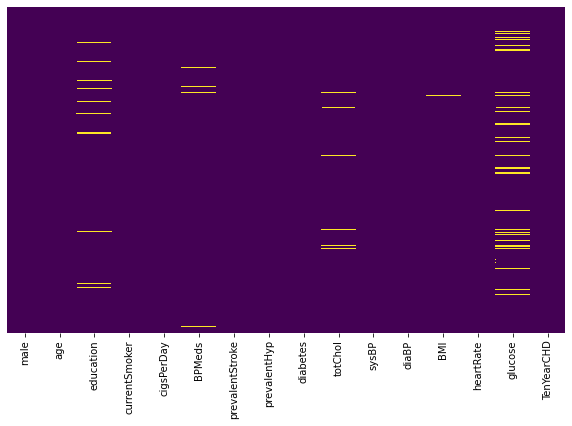

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [24]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [25]:
imputer= SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [26]:
data = df.values

In [27]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [28]:
imputer.fit(X)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [36]:
X_imputed = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [32]:
sum(np.isnan(X).flatten())

645

In [37]:
sum(np.isnan(X_imputed).flatten())

0

In [38]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

### Let's try to visualize the missing values.

<AxesSubplot:>

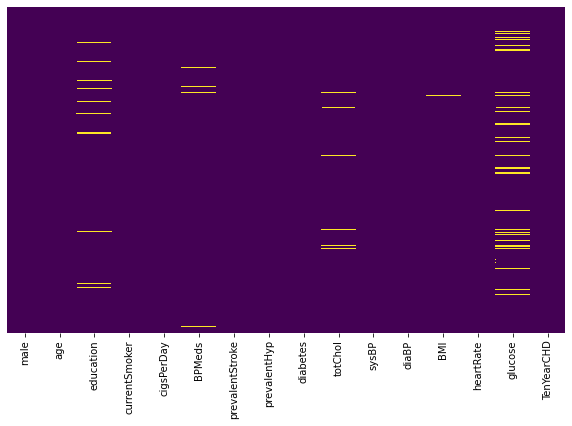

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(X_imputed.isna(), cbar=False, cmap='viridis', yticklabels=False)

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

<Figure size 720x432 with 0 Axes>

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [43]:
df_imputed = pd.DataFrame(data=X_imputed)
df_imputed


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753


<AxesSubplot:>

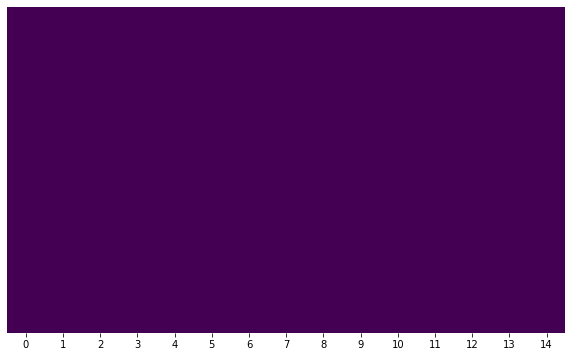

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df_imputed.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [46]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [47]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<AxesSubplot:>

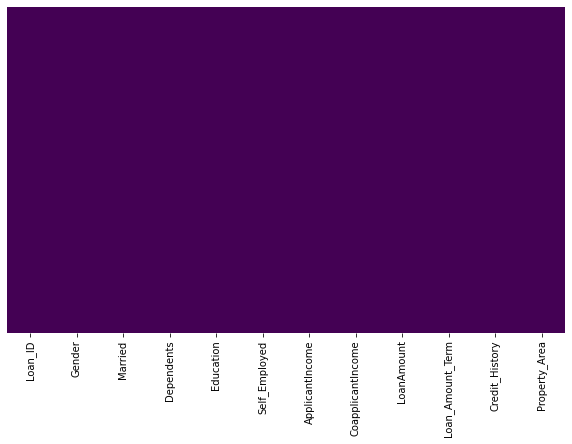

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [ ]:
No Missing data

# Build a Logistic Regression model Without imputation

In [50]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [61]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [63]:
df.shape

(4238, 16)

### Drop rows with missing values

In [64]:
df=df.dropna()
df.shape

(3656, 16)

### Split dataset into X and y

In [65]:
X= df[df.columns[:-1]]
X.shape

(3656, 15)

In [67]:
y= df[df.columns[-1]]
y.shape

(3656,)

### Create a pipeline with model parameter

In [69]:
model= LogisticRegression()

In [72]:
pipe= Pipeline([("model",model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [73]:
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [75]:
scores = cross_val_score(pipe, X,y, scoring= "accuracy", cv=cv, n_jobs=-1)

In [81]:
scores

array([0.85245902, 0.85245902, 0.85245902, 0.84153005, 0.84699454,
       0.84153005, 0.84657534, 0.86027397, 0.84109589, 0.84109589,
       0.84972678, 0.84972678, 0.85519126, 0.8442623 , 0.85519126,
       0.84699454, 0.84109589, 0.84383562, 0.85479452, 0.84931507,
       0.84972678, 0.84699454, 0.85519126, 0.8442623 , 0.84972678,
       0.84699454, 0.84931507, 0.85205479, 0.84109589, 0.83561644])

In [82]:
scores

array([0.85245902, 0.85245902, 0.85245902, 0.84153005, 0.84699454,
       0.84153005, 0.84657534, 0.86027397, 0.84109589, 0.84109589,
       0.84972678, 0.84972678, 0.85519126, 0.8442623 , 0.85519126,
       0.84699454, 0.84109589, 0.84383562, 0.85479452, 0.84931507,
       0.84972678, 0.84699454, 0.85519126, 0.8442623 , 0.84972678,
       0.84699454, 0.84931507, 0.85205479, 0.84109589, 0.83561644])

### Print the Mean Accuracy and Standard Deviation from scores

In [80]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.006


84.8% accuratewith +/- .5% tolerance

# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [85]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [86]:
df.shape

(4238, 16)

In [88]:
X= df[df.columns[:-1]]
X.shape

(4238, 15)

In [89]:
y= df[df.columns[-1]]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

### Create a SimpleImputer with mean strategy

In [91]:
imputer= SimpleImputer(strategy= 'mean')

### Create a Logistic Regression model

In [180]:
model=LogisticRegression()

### Create a pipeline with impute and model parameters

In [93]:
pipe= Pipeline([('impute', imputer),('model',model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [94]:
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [95]:
scores= cross_val_score(pipe,X,y, scoring= 'accuracy', cv=cv,n_jobs=-1)

In [96]:
scores

array([0.84669811, 0.85377358, 0.84669811, 0.8490566 , 0.84433962,
       0.84669811, 0.8490566 , 0.84669811, 0.85579196, 0.85106383,
       0.85141509, 0.85377358, 0.8490566 , 0.85613208, 0.84669811,
       0.84669811, 0.84433962, 0.84669811, 0.8534279 , 0.8534279 ,
       0.85141509, 0.8490566 , 0.8490566 , 0.84433962, 0.85141509,
       0.8490566 , 0.85141509, 0.85613208, 0.85106383, 0.8463357 ])

### Print the Mean Accuracy and Standard Deviation

In [100]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.85  | Std: 0.003


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

SimpleImputer with Mean Strategy

# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [167]:
imputer= SimpleImputer(strategy= 'median')

### Create a RandomForest model

In [179]:
model1=RandomForestClassifier()

### Create a pipeline

In [144]:
pipe= Pipeline([('impute', imputer),('model1',model)])

### Create RepeatedStratifiedKFold

In [162]:
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Create Cross_val_score

In [163]:
rf_scores= cross_val_score(pipe,X,y, scoring= 'accuracy', cv=cv,n_jobs=-1)
rf_scores

array([0.85613208, 0.84433962, 0.85377358, 0.84198113, 0.85613208,
       0.84669811, 0.84669811, 0.84198113, 0.8534279 , 0.8534279 ,
       0.84669811, 0.84669811, 0.83726415, 0.8490566 , 0.85141509,
       0.84669811, 0.84433962, 0.84198113, 0.84869976, 0.85815603,
       0.84198113, 0.85141509, 0.86084906, 0.84669811, 0.84433962,
       0.83726415, 0.84433962, 0.85377358, 0.8534279 , 0.84397163])

### Print Mean Accuracy and Standard Deviation

In [164]:
print(f"Median Accuracy: {round(np.mean(rf_scores), 3)}  | Std: {round(np.std(scores), 3)}")

Median Accuracy: 0.848  | Std: 0.007


# Imputation with RandomForest

In [181]:
#I have used the previous code script which taught in class by Prof.Vejey Subash Gandyer
results_rf =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model1', model1)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results_rf.append(scores)
    
for method, accuracy in zip(strategies, results_rf):
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}       |   Max accuracy: {round(np.max(accuracy), 3)}      |   Std: {round(np.std(scores), 3)}")
    

Strategy: mean >> Accuracy: 0.849       |   Max accuracy: 0.861      |   Std: 0.006
Strategy: median >> Accuracy: 0.848       |   Max accuracy: 0.861      |   Std: 0.006
Strategy: most_frequent >> Accuracy: 0.849       |   Max accuracy: 0.863      |   Std: 0.006
Strategy: constant >> Accuracy: 0.848       |   Max accuracy: 0.861      |   Std: 0.006


# Imputation with KNN

In [173]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

In [209]:
results_knn =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model2', model2)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results_knn.append(scores)
    
for method, accuracy in zip(strategies, results_knn):
    
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}       |   Max accuracy: {round(np.max(accuracy), 3)}      |   Std: {round(np.std(scores), 3)}")


Strategy: mean >> Accuracy: 0.837       |   Max accuracy: 0.858      |   Std: 0.01
Strategy: median >> Accuracy: 0.836       |   Max accuracy: 0.856      |   Std: 0.01
Strategy: most_frequent >> Accuracy: 0.835       |   Max accuracy: 0.854      |   Std: 0.01
Strategy: constant >> Accuracy: 0.837       |   Max accuracy: 0.861      |   Std: 0.01


# Imputation With LogisticRegression

In [ ]:
model=LogisticRegression()

In [178]:
results =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results.append(scores)
    
for method, accuracy in zip(strategies, results):
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}       |   Max accuracy: {round(np.max(accuracy), 3)}      |   Std: {round(np.std(scores), 3)}")
    

Strategy: mean >> Accuracy: 0.847       |   Max accuracy: 0.861      |   Std: 0.007
Strategy: median >> Accuracy: 0.848       |   Max accuracy: 0.863      |   Std: 0.007
Strategy: most_frequent >> Accuracy: 0.848       |   Max accuracy: 0.868      |   Std: 0.007
Strategy: constant >> Accuracy: 0.849       |   Max accuracy: 0.863      |   Std: 0.007


# Imputation With SVM

In [186]:
from sklearn import svm
model3= svm.SVC()

In [187]:
results_svm =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model3', model3)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results_svm.append(scores)
    
for method, accuracy in zip(strategies, results_svm):
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}       |   Max accuracy: {round(np.max(accuracy), 3)}      |   Std: {round(np.std(scores), 3)}")

Strategy: mean >> Accuracy: 0.85       |   Max accuracy: 0.856      |   Std: 0.005
Strategy: median >> Accuracy: 0.849       |   Max accuracy: 0.854      |   Std: 0.005
Strategy: most_frequent >> Accuracy: 0.848       |   Max accuracy: 0.856      |   Std: 0.005
Strategy: constant >> Accuracy: 0.849       |   Max accuracy: 0.866      |   Std: 0.005


# Imputation With NaiveBayes

In [206]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()


In [208]:
results_nb =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model4', model4)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results_nb.append(scores)
    
for method, accuracy in zip(strategies, results_nb):
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}       |   Max accuracy: {round(np.max(accuracy), 3)}      |   Std: {round(np.std(scores), 3)}")

Strategy: mean >> Accuracy: 0.824       |   Max accuracy: 0.851      |   Std: 0.014
Strategy: median >> Accuracy: 0.824       |   Max accuracy: 0.851      |   Std: 0.014
Strategy: most_frequent >> Accuracy: 0.824       |   Max accuracy: 0.851      |   Std: 0.014
Strategy: constant >> Accuracy: 0.821       |   Max accuracy: 0.856      |   Std: 0.014


# Imputation With DecisionTree

In [201]:

from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(random_state=0)

In [203]:
results_dt =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model5', model5)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results_dt.append(scores)
    
for method, accuracy in zip(strategies, results_dt):
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}       |   Max accuracy: {round(np.max(accuracy), 3)}      |   Std: {round(np.std(scores), 3)}")
    

Strategy: mean >> Accuracy: 0.754       |   Max accuracy: 0.785      |   Std: 0.022
Strategy: median >> Accuracy: 0.753       |   Max accuracy: 0.797      |   Std: 0.022
Strategy: most_frequent >> Accuracy: 0.755       |   Max accuracy: 0.792      |   Std: 0.022
Strategy: constant >> Accuracy: 0.757       |   Max accuracy: 0.8      |   Std: 0.022


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [ ]:
1.KNN (Mean)                   Accuracy: 0.837       |   Max accuracy: 0.858      |   Std: 0.01 (Less Variance)
2.SVM  (Mean)                  Accuracy: 0.85        |   Max accuracy: 0.856      |   Std: 0.005
3.RandomForest(most_frequent)  Accuracy: 0.849       |   Max accuracy: 0.863      |   Std: 0.006   
            